In [4]:
# Constants

RAW_DATA_FILES_PATH = "data"
OUTPUT_LABEL = "PM2.5 (µg/m³)"

In [5]:
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Data Analysis
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(PM2.5)

In [14]:
# reading base file for analysis
# TODO: add a method to pass a file to do all data andlysis on it
df = pd.read_csv(path.join(RAW_DATA_FILES_PATH, "2019.csv"))

In [15]:
features_with_na = [
    feature for feature in df.columns if df[feature].isnull().sum() > 1
]

In [16]:
features_with_na

['O Xylene (µg/m³)',
 'Eth-Benzene (µg/m³)',
 'MP-Xylene (µg/m³)',
 'VWS (m/s)',
 'Festival_Name',
 'PM2.5 (µg/m³)_AQI',
 'PM10 (µg/m³)_AQI',
 'CO (mg/m³)_AQI',
 'NO2 (µg/m³)_AQI',
 'SO2 (µg/m³)_AQI']

In [17]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), " % missing values")

O Xylene (µg/m³) 0.3013  % missing values
Eth-Benzene (µg/m³) 0.0002  % missing values
MP-Xylene (µg/m³) 0.0002  % missing values
VWS (m/s) 1.0  % missing values
Festival_Name 0.8877  % missing values
PM2.5 (µg/m³)_AQI 0.0274  % missing values
PM10 (µg/m³)_AQI 0.0086  % missing values
CO (mg/m³)_AQI 0.085  % missing values
NO2 (µg/m³)_AQI 0.0143  % missing values
SO2 (µg/m³)_AQI 0.0015  % missing values


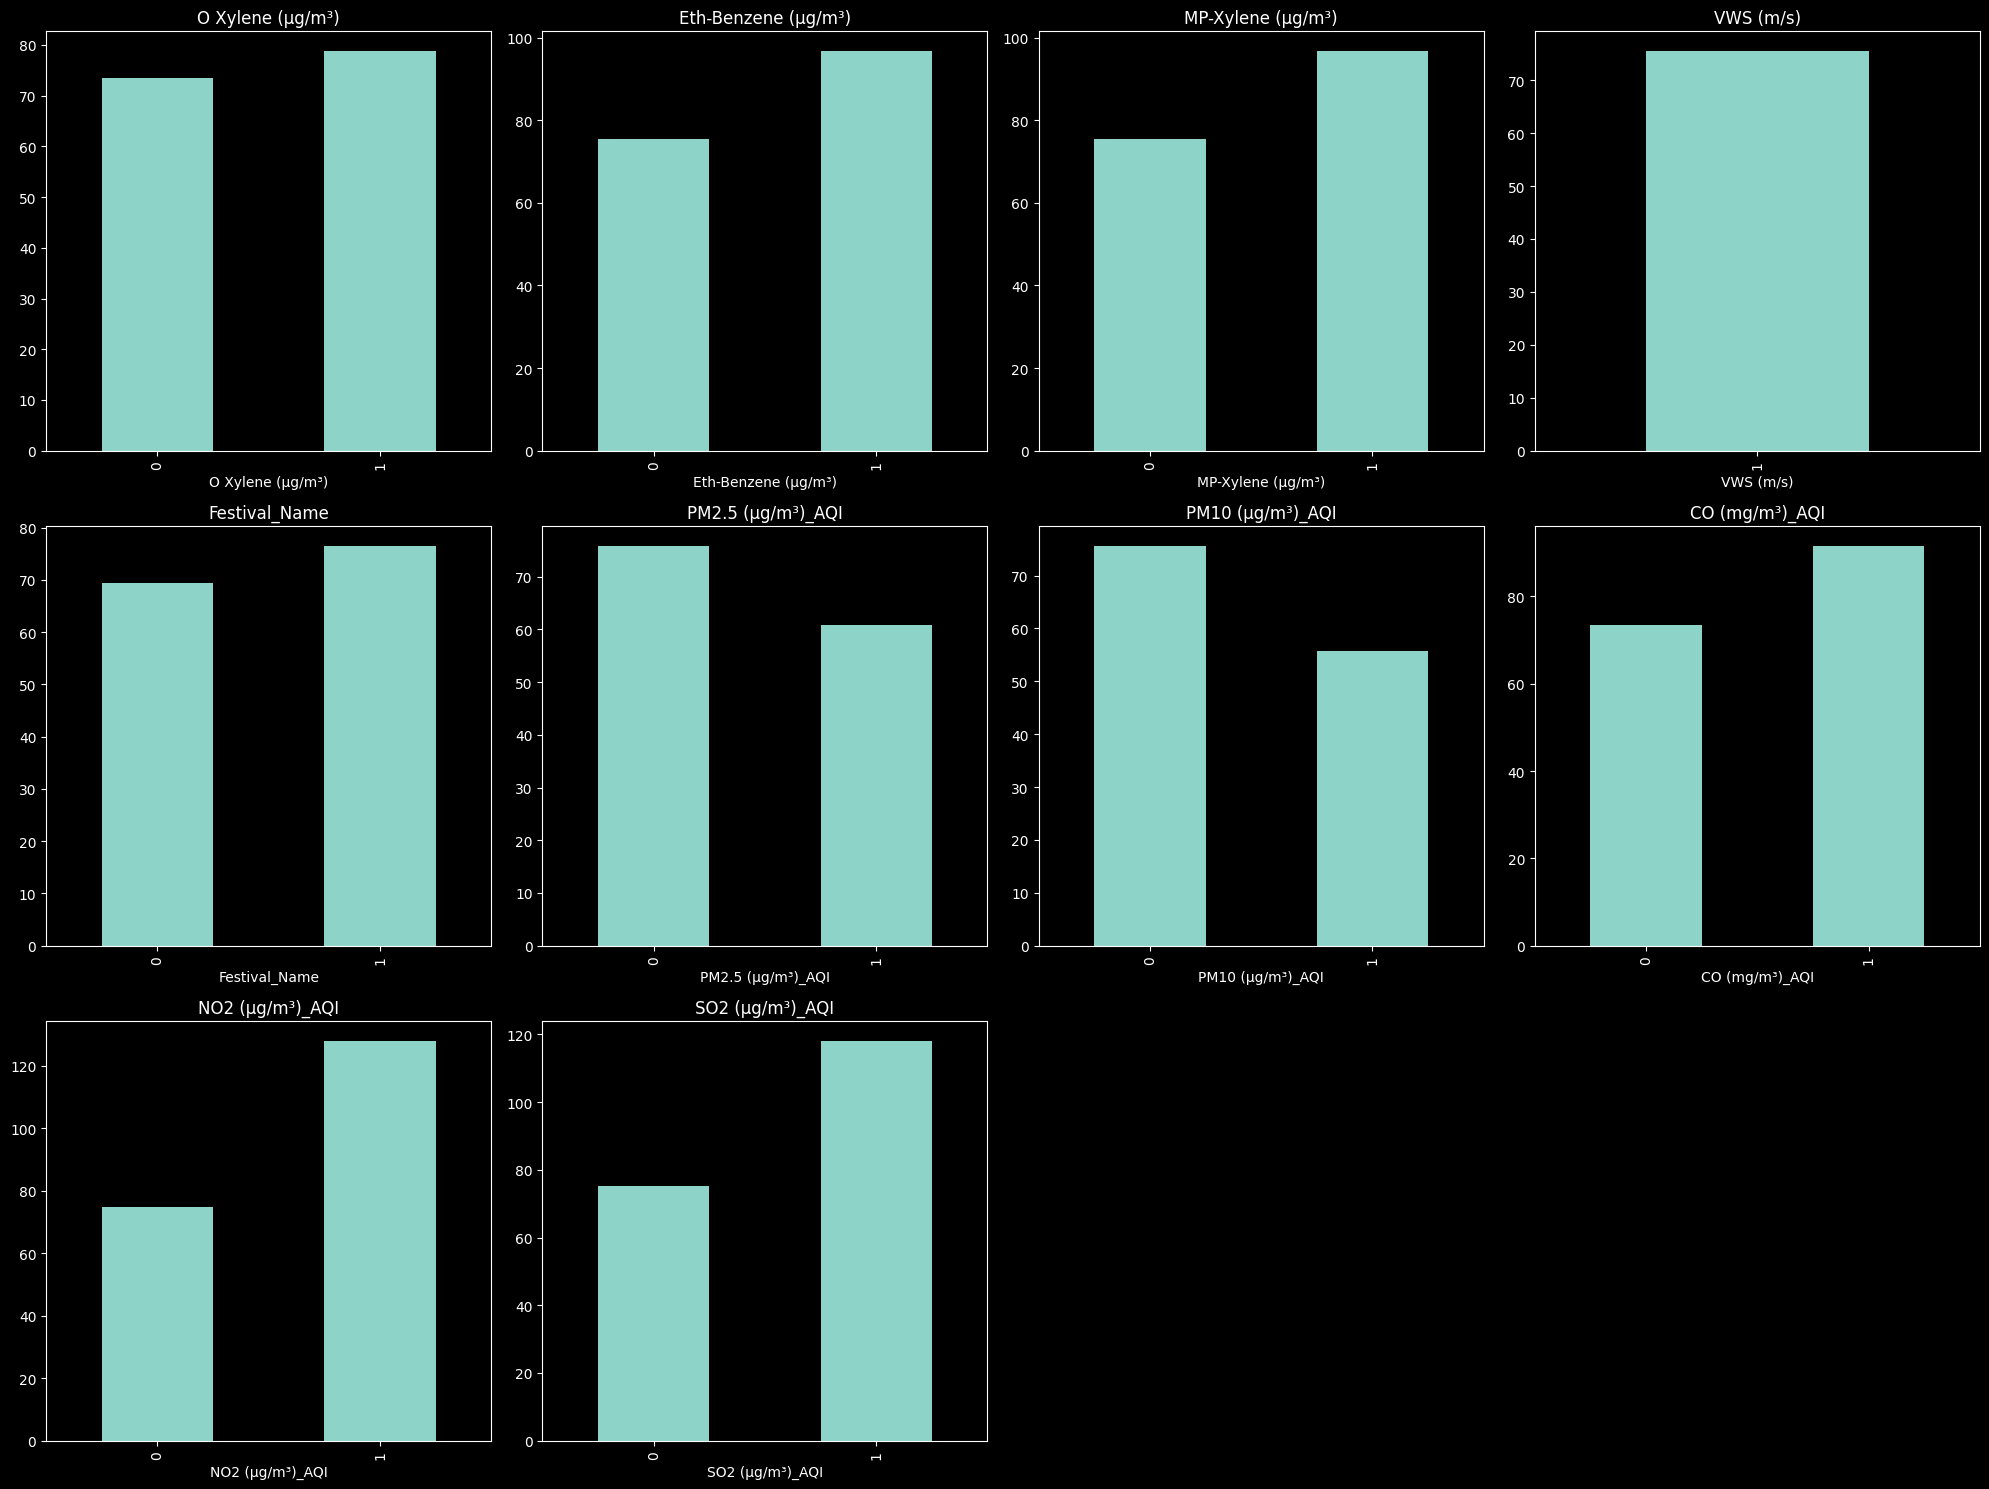

In [18]:
col = 4
row = math.ceil(len(features_with_na) / col)

fig, axes = plt.subplots(row, col, figsize=(20, 5 * row))
axes = axes.flatten()

data = df.copy()

for i, feature in enumerate(features_with_na):
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)["PM2.5 (µg/m³)"].median().plot.bar(ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here the relationship between missing values and dependent variable is clearly visible. So we need to replace these nan values with something meaningful in feature engineering.

from above dataset VWS (m/s) is not needed since it is all null

In [19]:
print("VWS (m/s) {}".format(len(df["VWS (m/s)"])))

VWS (m/s) 8760


In [20]:
df = df.drop(
    [
        "VWS (m/s)",
        "O Xylene (µg/m³)",
        "Eth-Benzene (µg/m³)",
        "MP-Xylene (µg/m³)",
        "Xylene (µg/m³)",
    ],
    axis=1,
)

### Numerical Values

In [21]:
pd.set_option('display.max_columns', None)

In [24]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != "O"]

print("Number of numerical variables: ", len(numerical_features))
print("data shape: ",df.shape)

df[numerical_features].head()

Number of numerical variables:  29
data shape:  (8760, 32)


,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),Month,Date,Festival,PM2.5 (µg/m³)_AQI,PM10 (µg/m³)_AQI,CO (mg/m³)_AQI,NO2 (µg/m³)_AQI,SO2 (µg/m³)_AQI,NH3 (µg/m³)_AQI,Overall_AQI
0,313.968571,424.79300,125.440833,62.944167,116.227143,56.976,13.033571,1.662857,11.218571,2.735714,15.281429,7.43375,77.739,0.434167,95.811667,0.0,0.0,10.385833,832.315833,1,1,True,409.0,393.0,82.0,79.0,16.0,14.0,409.0
1,324.452143,440.62900,116.475833,61.730833,109.737857,61.844,13.277500,1.989167,9.440000,2.682143,14.834286,6.90500,78.787,0.505833,98.981667,0.0,0.0,10.415833,832.235000,1,1,True,411.0,403.0,99.0,77.0,17.0,15.0,411.0
2,316.057143,434.88800,142.742000,60.972500,110.983571,58.916,12.306667,1.344286,12.436667,2.772857,14.968571,6.56125,79.509,0.457500,105.957500,0.0,0.0,10.713333,832.165000,1,1,True,410.0,402.0,64.0,76.0,15.0,15.0,410.0
3,304.890000,440.80625,146.989000,62.885833,114.212143,56.146,11.182500,1.572857,13.931000,2.562857,14.727857,6.23375,80.840,0.489167,100.542500,0.0,0.0,10.260833,832.023333,1,1,True,408.0,403.0,77.0,78.0,14.0,14.0,408.0
4,286.830714,420.62125,144.520000,51.044167,107.585714,58.978,10.959167,1.445714,12.259167,2.495000,14.171429,5.86500,81.224,0.453333,99.990000,0.0,0.0,10.842500,831.681667,1,1,True,406.0,388.0,70.0,64.0,14.0,15.0,406.0


##### Datetime variables

In [13]:
data = df.copy()
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month

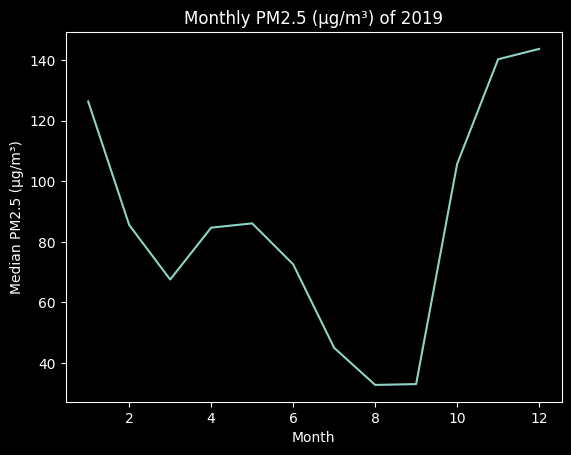

In [14]:
data.groupby("Month")[OUTPUT_LABEL].median().plot()
plt.xlabel("Month")
plt.ylabel(f"Median {OUTPUT_LABEL}")
plt.title(f"Monthly {OUTPUT_LABEL} of 2019")
plt.show()

In [25]:
numerical_features_no_label = numerical_features.copy()
numerical_features_no_label.remove(OUTPUT_LABEL)

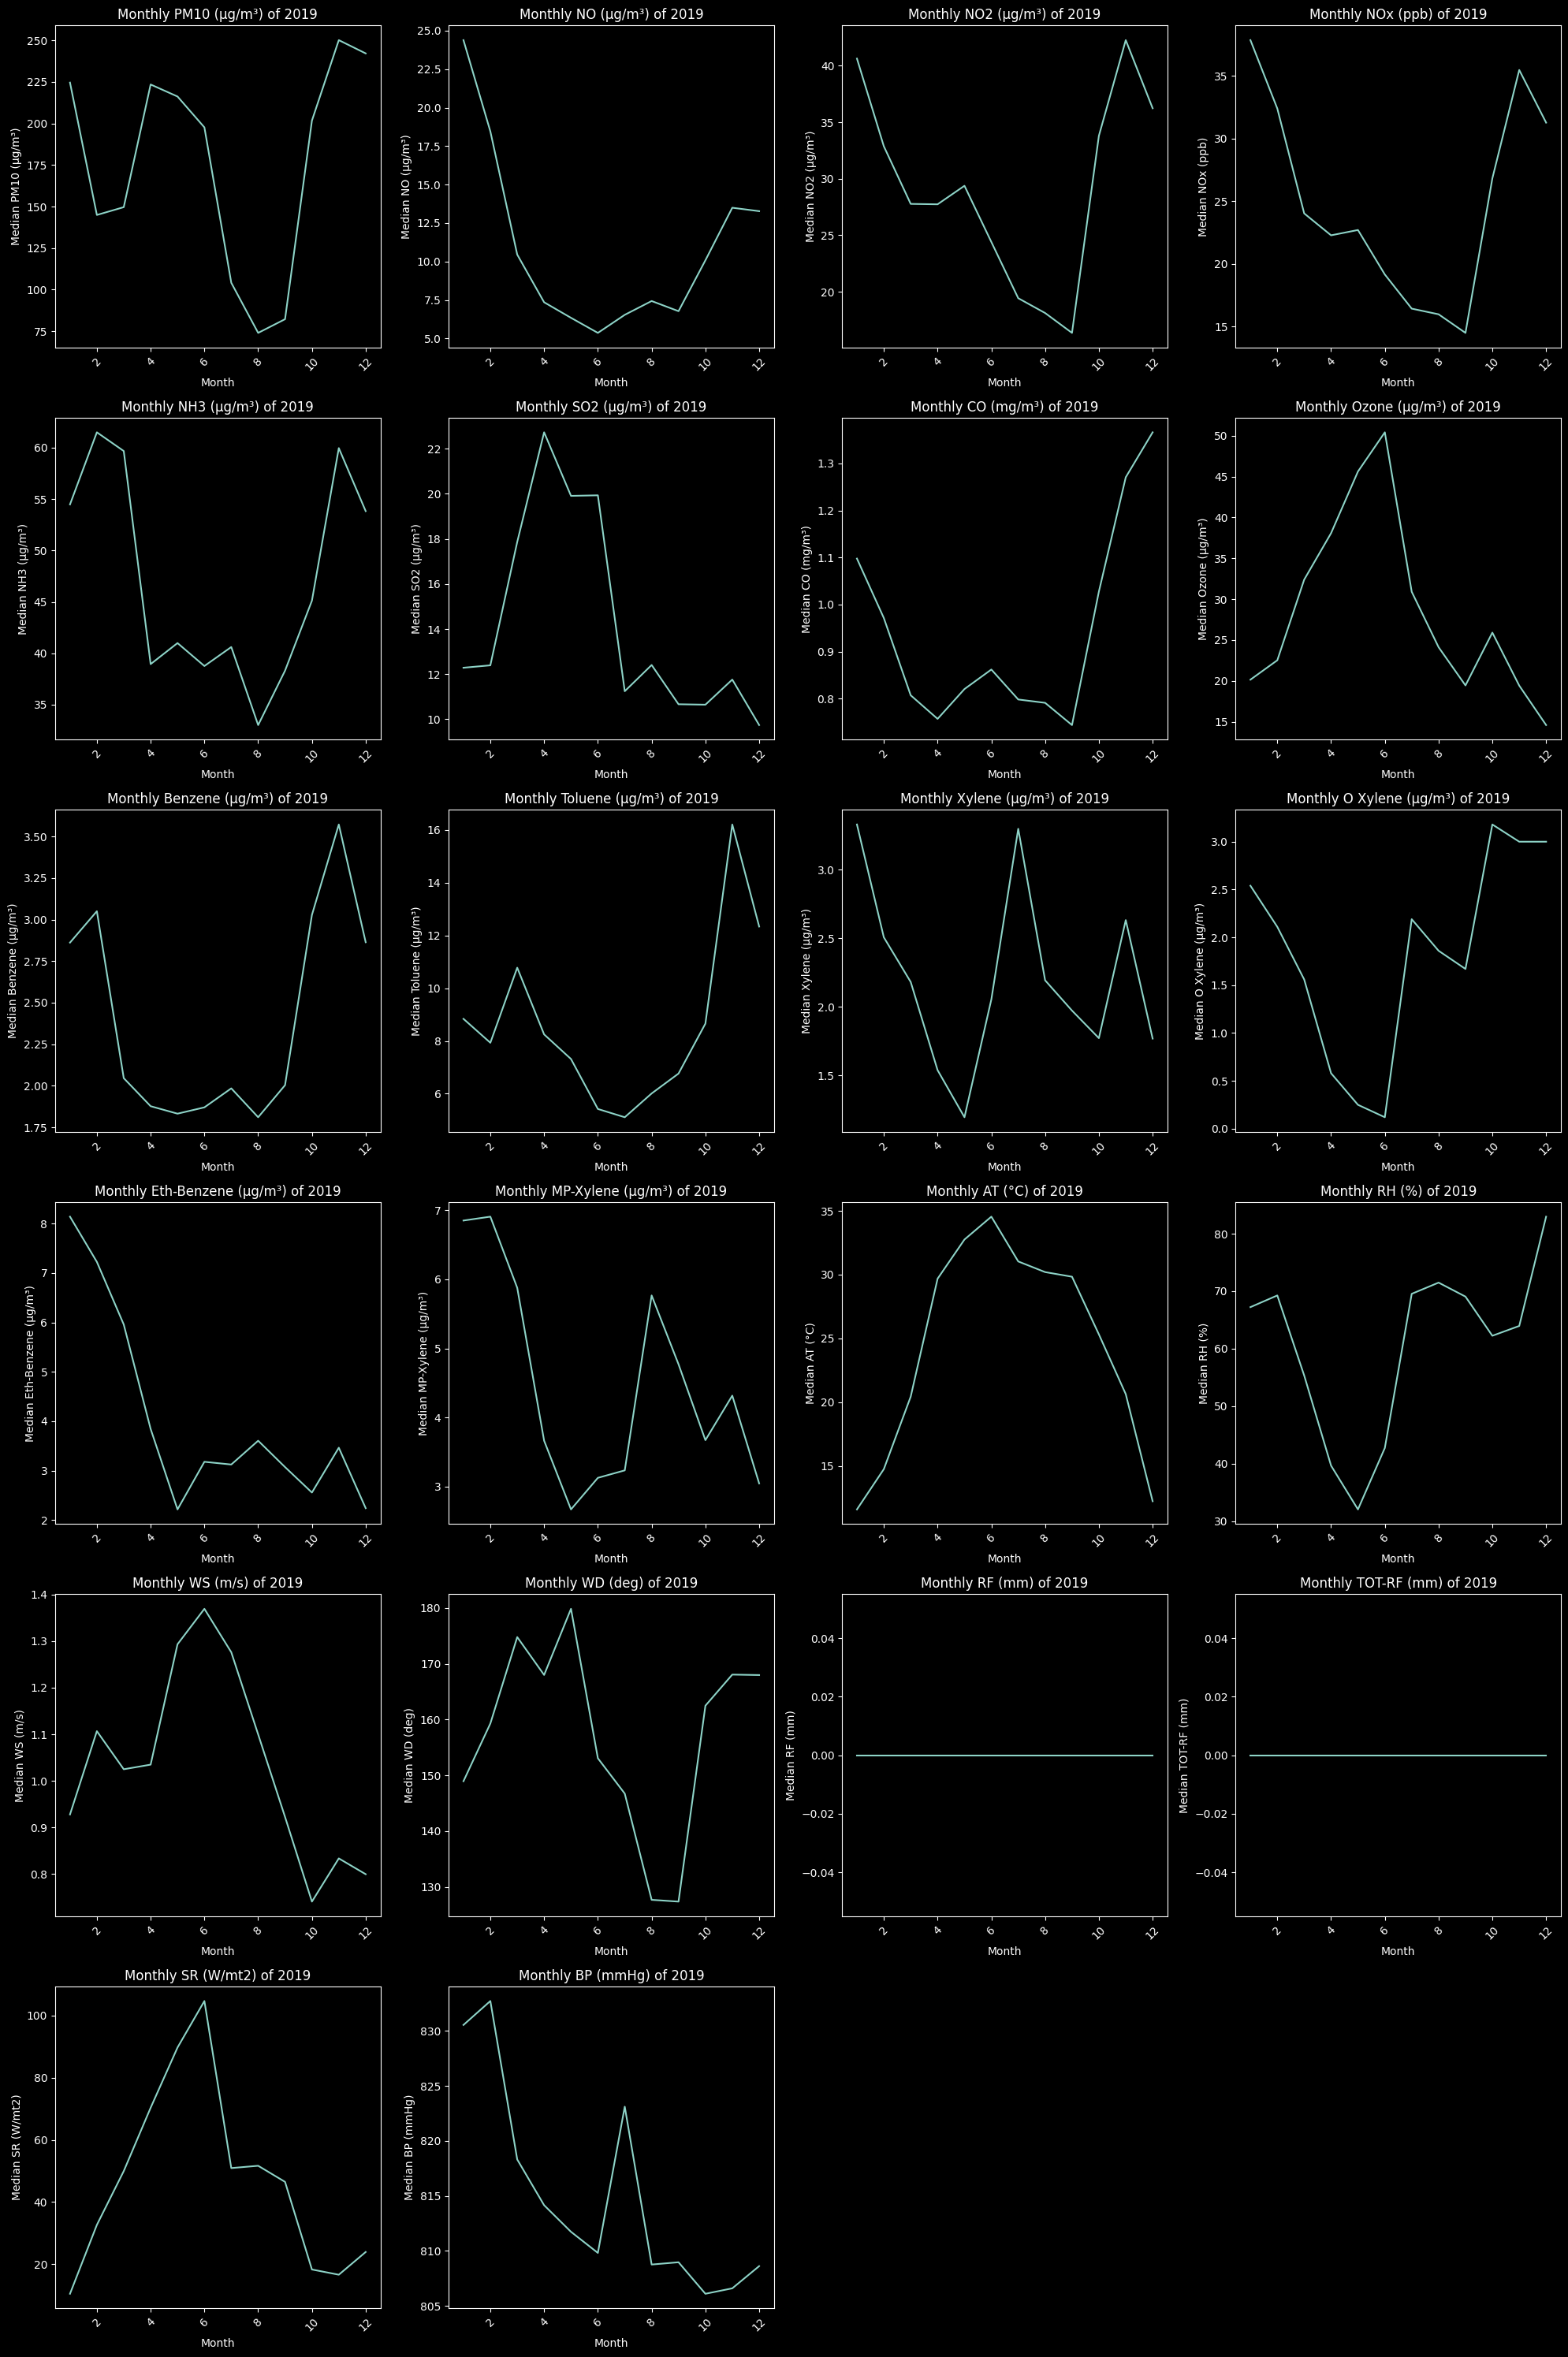

In [16]:
num_features = len(numerical_features_no_label)  # excluding the output label
cols = 4
rows = math.ceil(num_features / cols)

data_num = data.drop(OUTPUT_LABEL, axis=1)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features_no_label):
    if feature != OUTPUT_LABEL:
        data_num.groupby("Month")[feature].median().plot(ax=axes[i])
        axes[i].set_title(f"Monthly {feature} of 2019")
        axes[i].set_xlabel("Month")
        axes[i].set_ylabel(f"Median {feature}")
        axes[i].tick_params(axis="x", rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Discrete features
Analyse the frequency and count of discrete with bar graphs

In [17]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print("Number of discrete variables: ", len(discrete_features))

Number of discrete variables:  0


No discrete features in dataset so coninuous features => numerical features

##### Continuous features
Analyse the distribution of continuous features with histogram

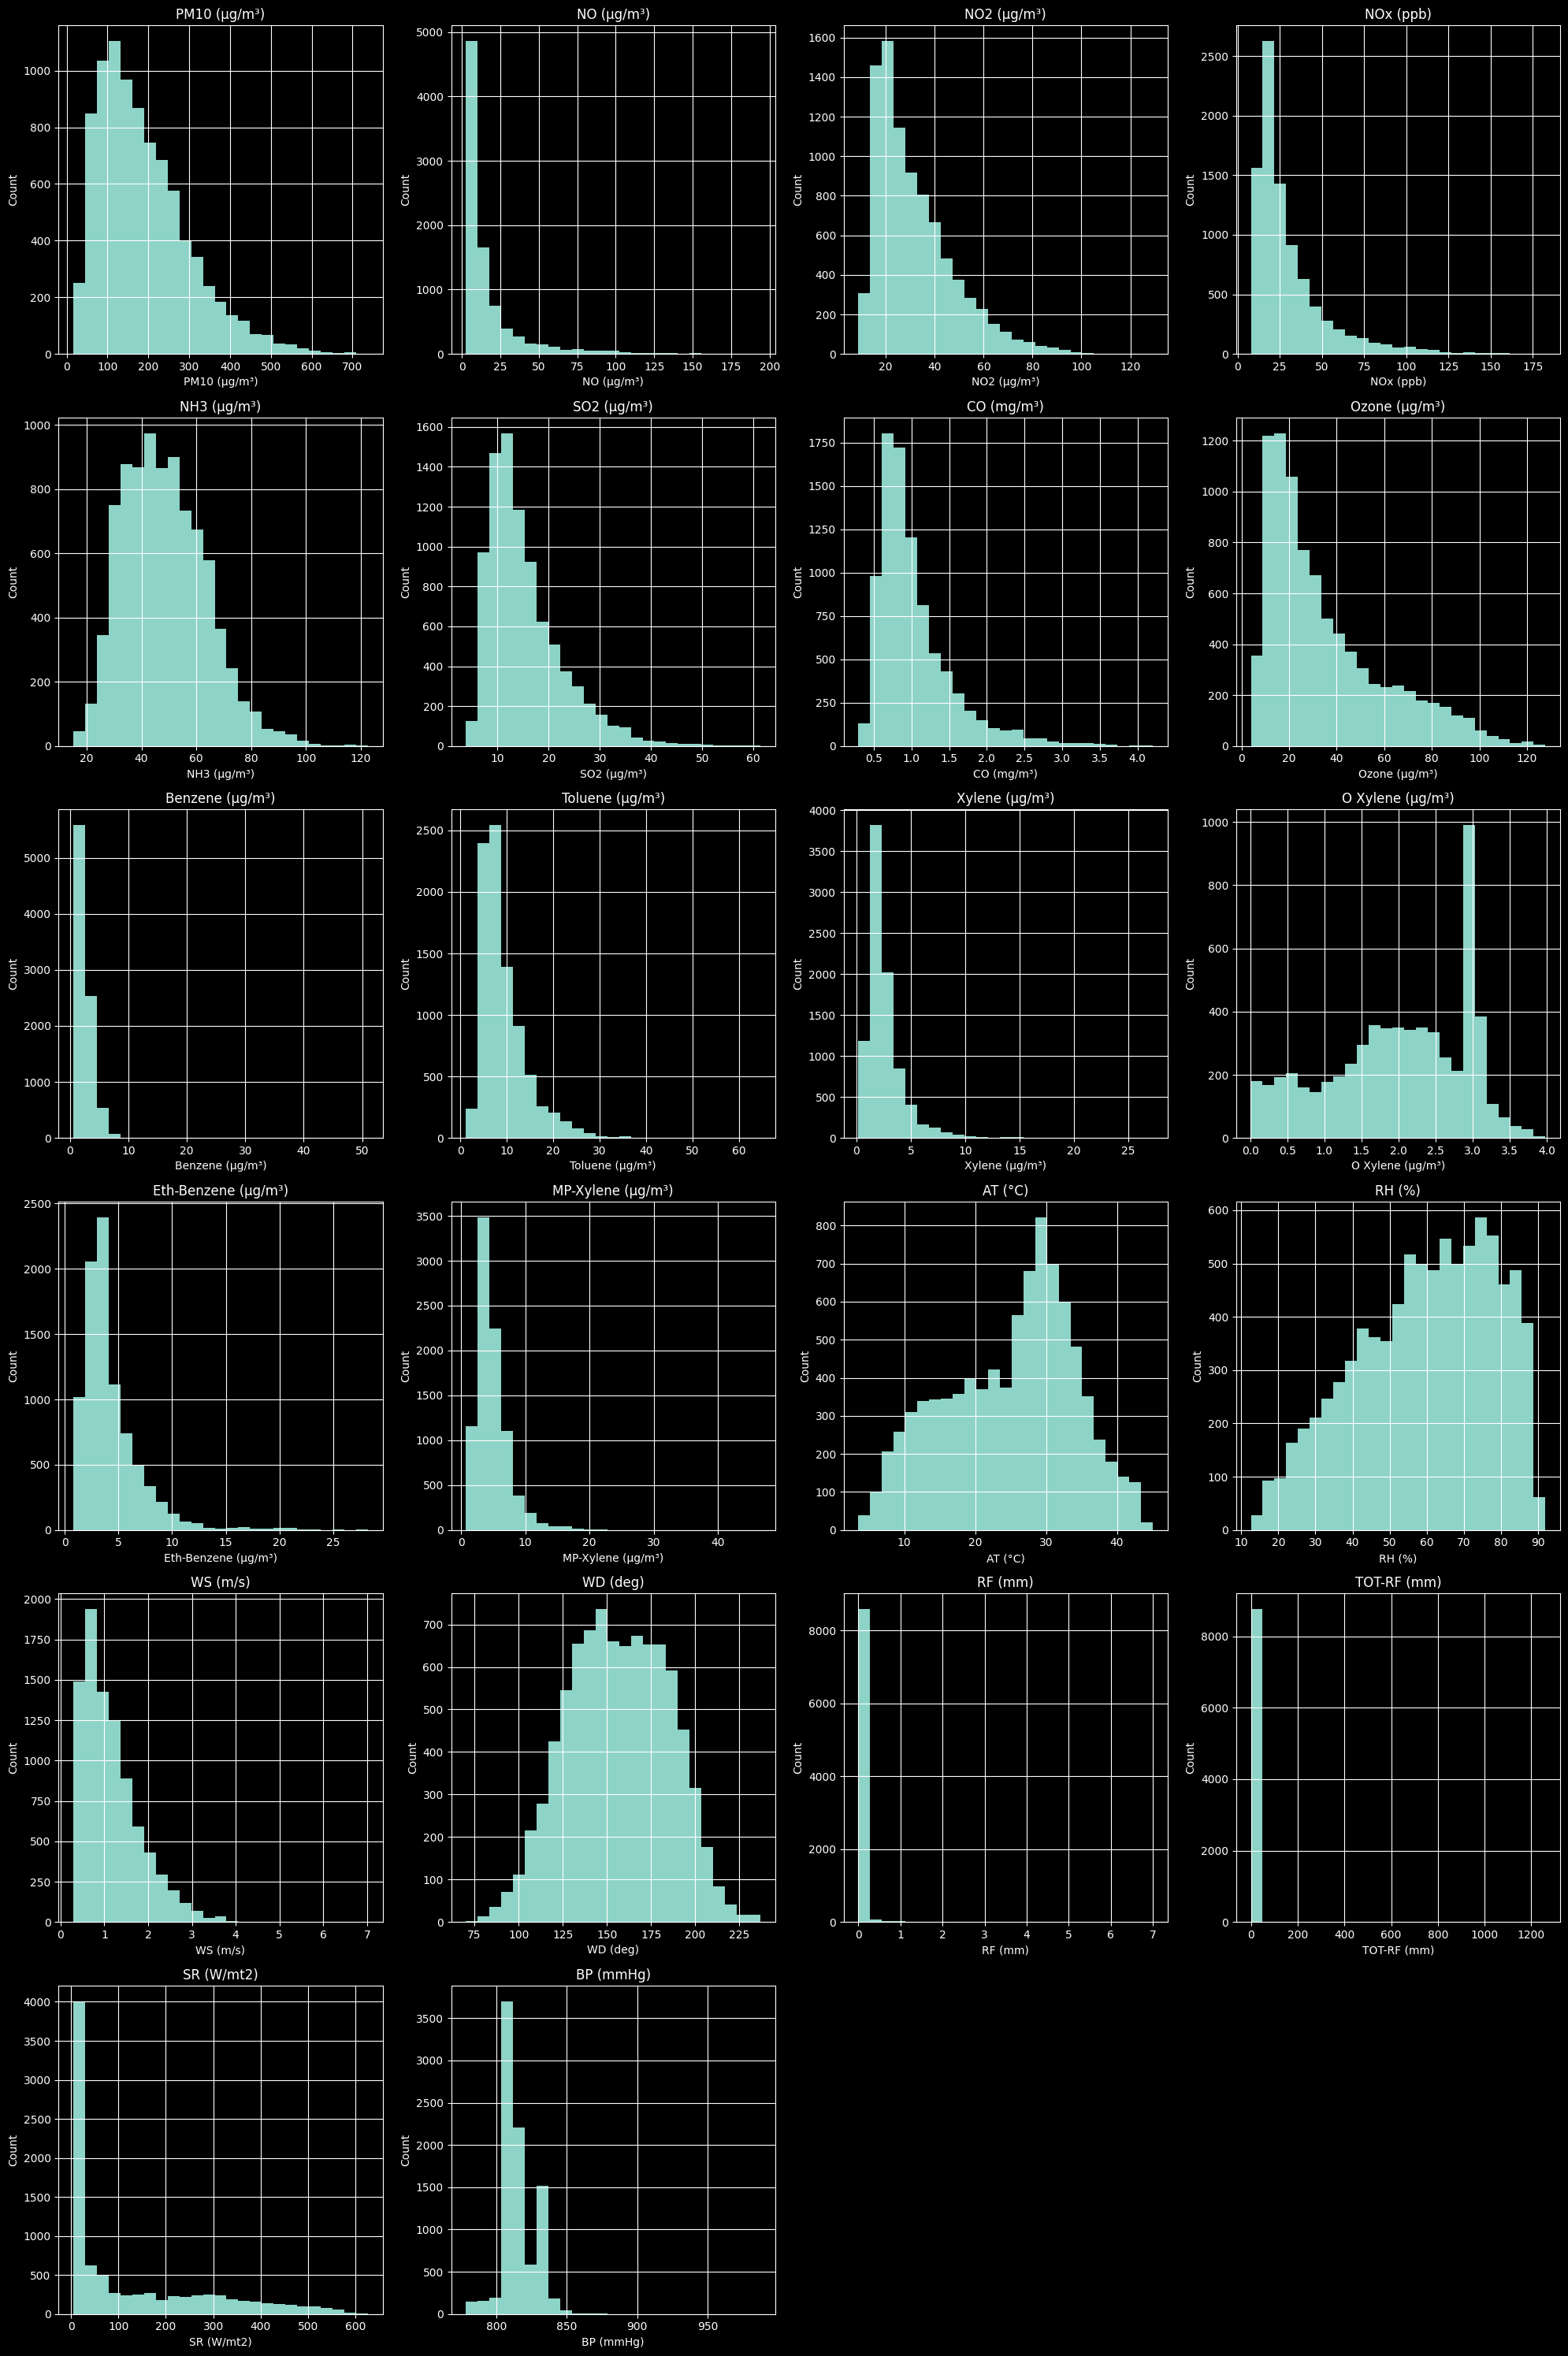

In [20]:
col = 4
row = math.ceil(len(numerical_features_no_label) / col)

fig, axes = plt.subplots(row, col, figsize=(20, 5 * row))
axes = axes.flatten()

data = df.copy()

for i, feature in enumerate(numerical_features_no_label):
    data[feature].hist(bins=25, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In the histograms on continous variables there are many features that are right skewed, left skewed and some are normal

We will use logarithmic transformation

In [27]:
df.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'AT (°C)',
       'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'Month', 'Date', 'Festival', 'Festival_Name',
       'PM2.5 (µg/m³)_AQI', 'PM10 (µg/m³)_AQI', 'CO (mg/m³)_AQI',
       'NO2 (µg/m³)_AQI', 'SO2 (µg/m³)_AQI', 'NH3 (µg/m³)_AQI', 'Overall_AQI',
       'Highest_Sub_Index'],
      dtype='object')

In [22]:
plt.style.use("seaborn-v0_8-whitegrid")

In [36]:
non_null_features = [
    "PM2.5 (µg/m³)",
    "PM10 (µg/m³)",
    "NO (µg/m³)",
    "NO2 (µg/m³)",
    "NOx (ppb)",
    "NH3 (µg/m³)",
    "SO2 (µg/m³)",
    "CO (mg/m³)",
    "Ozone (µg/m³)",
    "Benzene (µg/m³)",
    "Toluene (µg/m³)",
    "AT (°C)",
    "RH (%)",
    "WS (m/s)",
    "WD (deg)",
    # "RF (mm)",
    # "TOT-RF (mm)",
    "SR (W/mt2)",
    "BP (mmHg)",
]

In [37]:
numerical_features_no_label = non_null_features.copy()
numerical_features_no_label.remove(OUTPUT_LABEL)

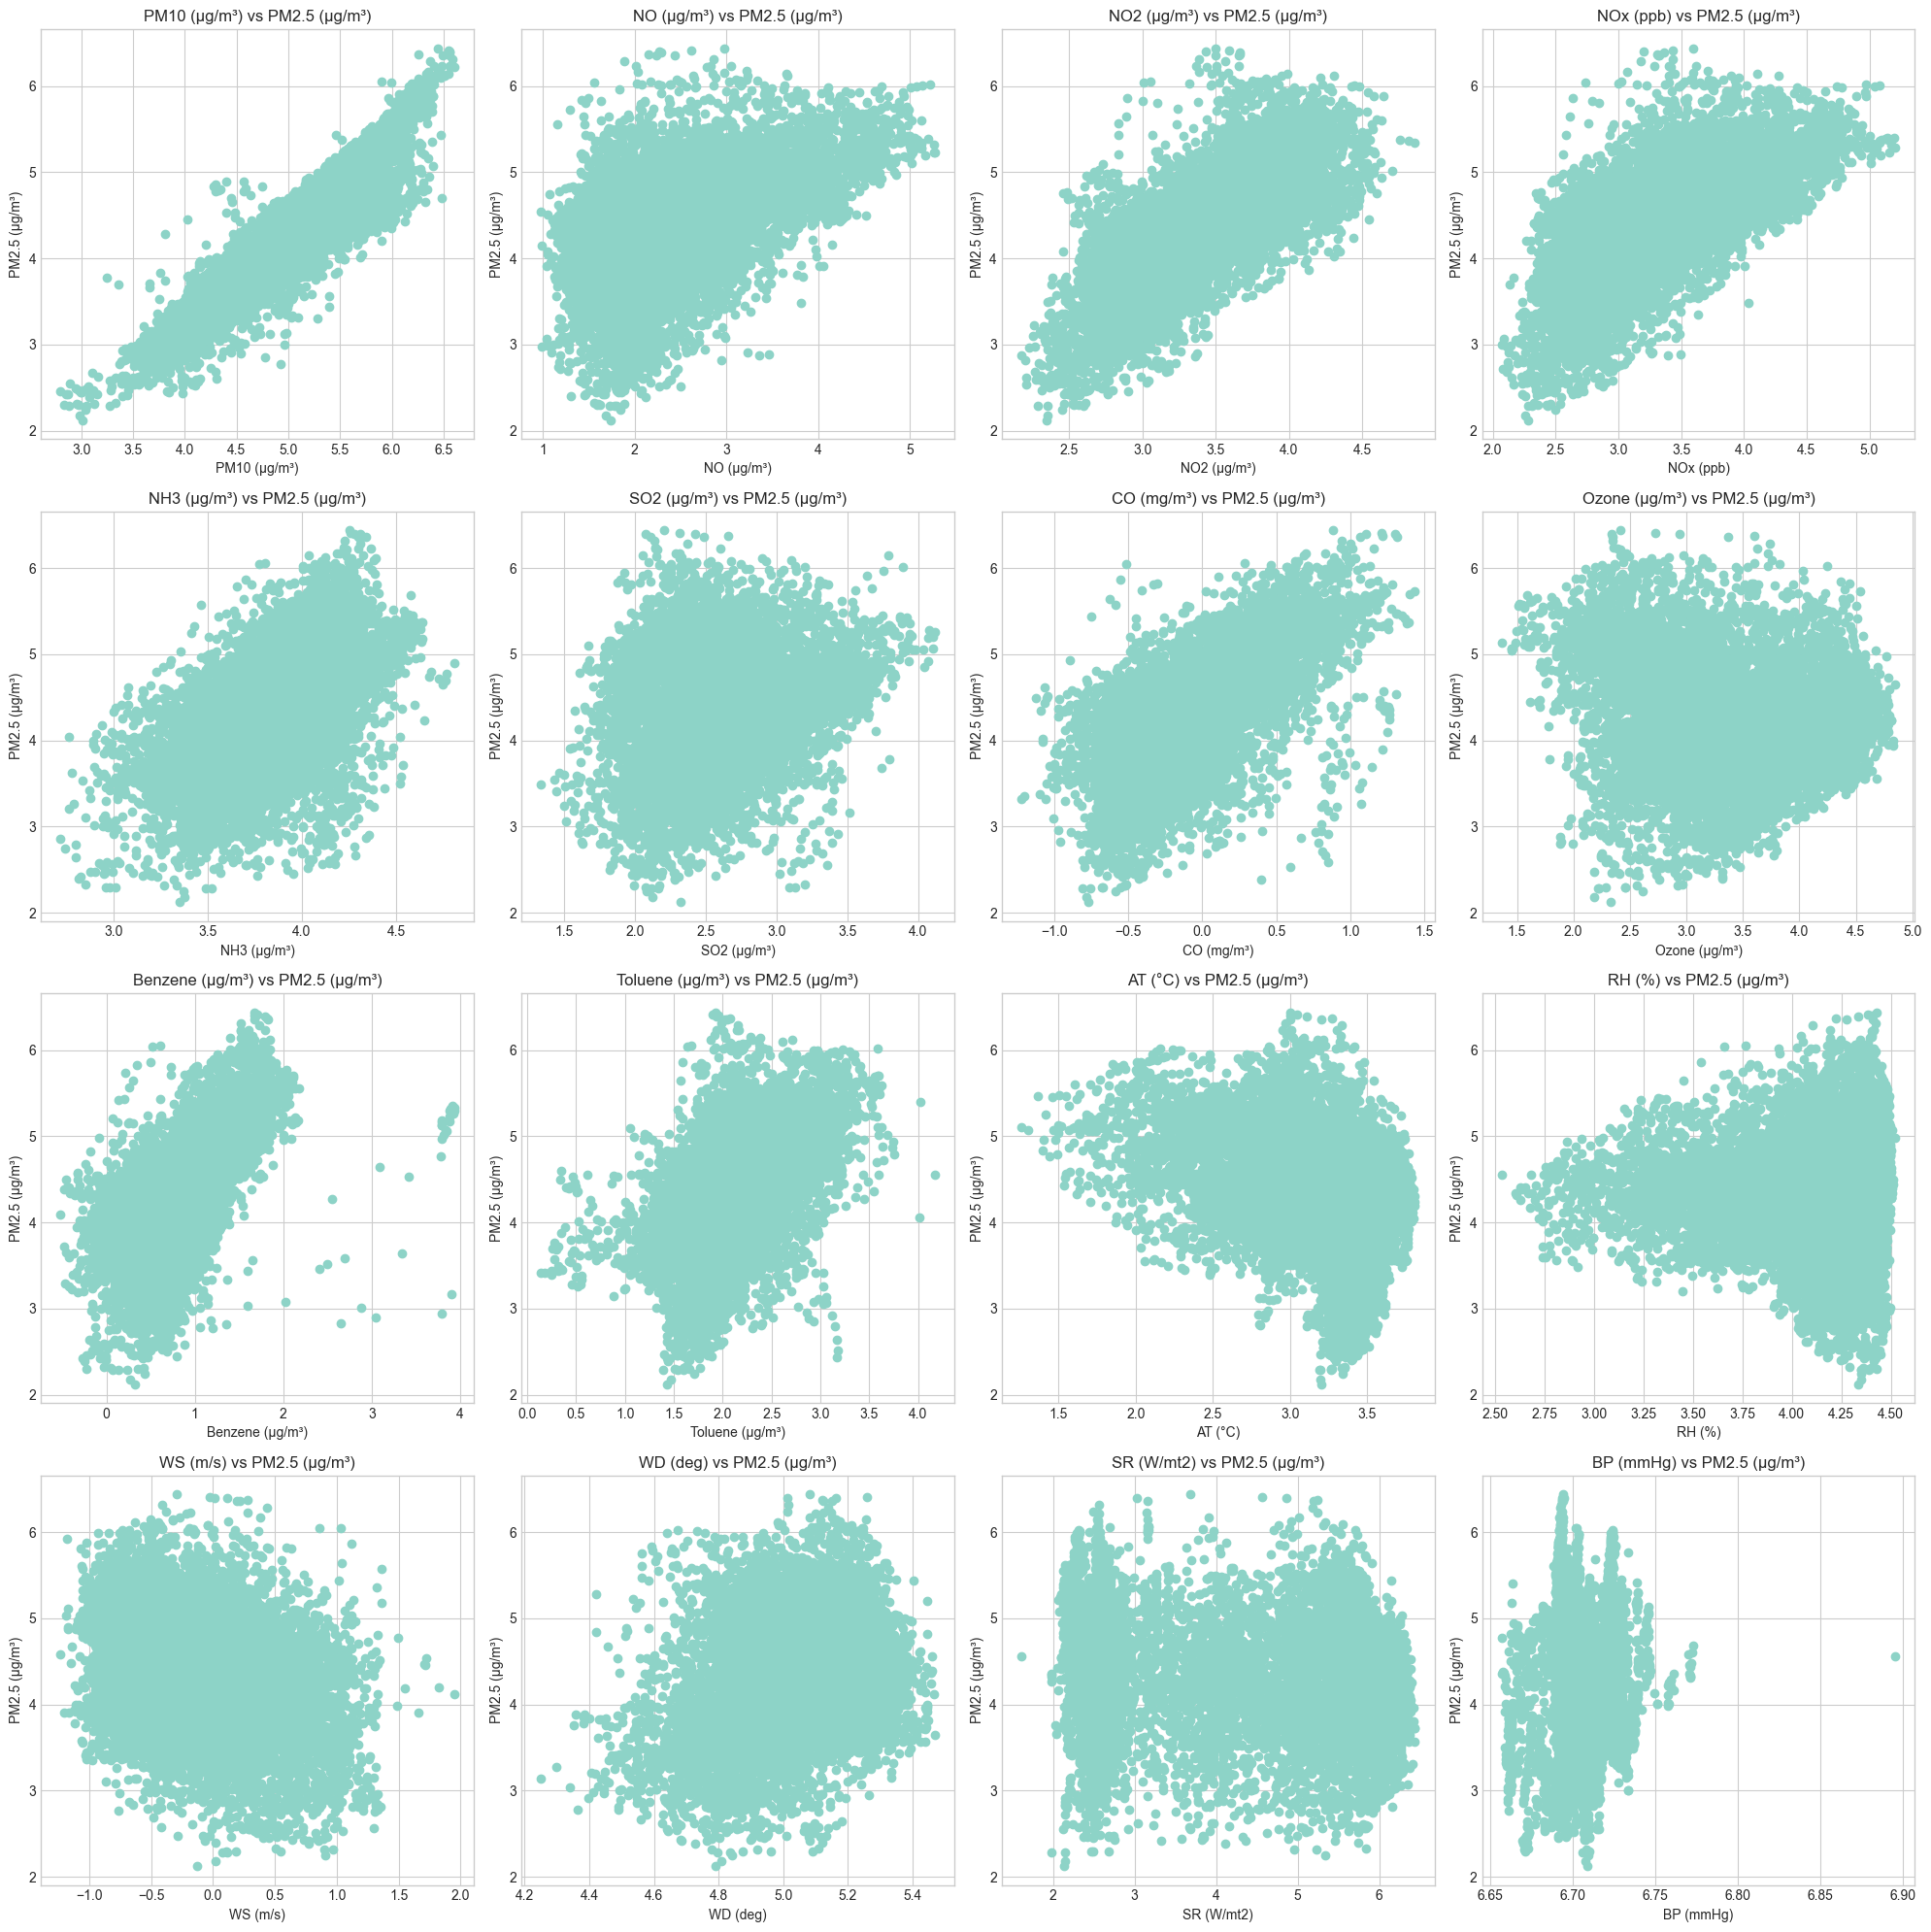

In [43]:
col = 4
row = math.ceil(len(numerical_features_no_label) / col)

fig, axes = plt.subplots(row, col, figsize=(20, 5 * row))
axes = axes.flatten()

data = df[non_null_features].copy()
data[OUTPUT_LABEL] = np.log(data[OUTPUT_LABEL])

for i, feature in enumerate(numerical_features_no_label):
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        axes[i].scatter(data[feature], data[OUTPUT_LABEL])
        axes[i].set_title(f"{feature} vs {OUTPUT_LABEL}")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(OUTPUT_LABEL)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outliers

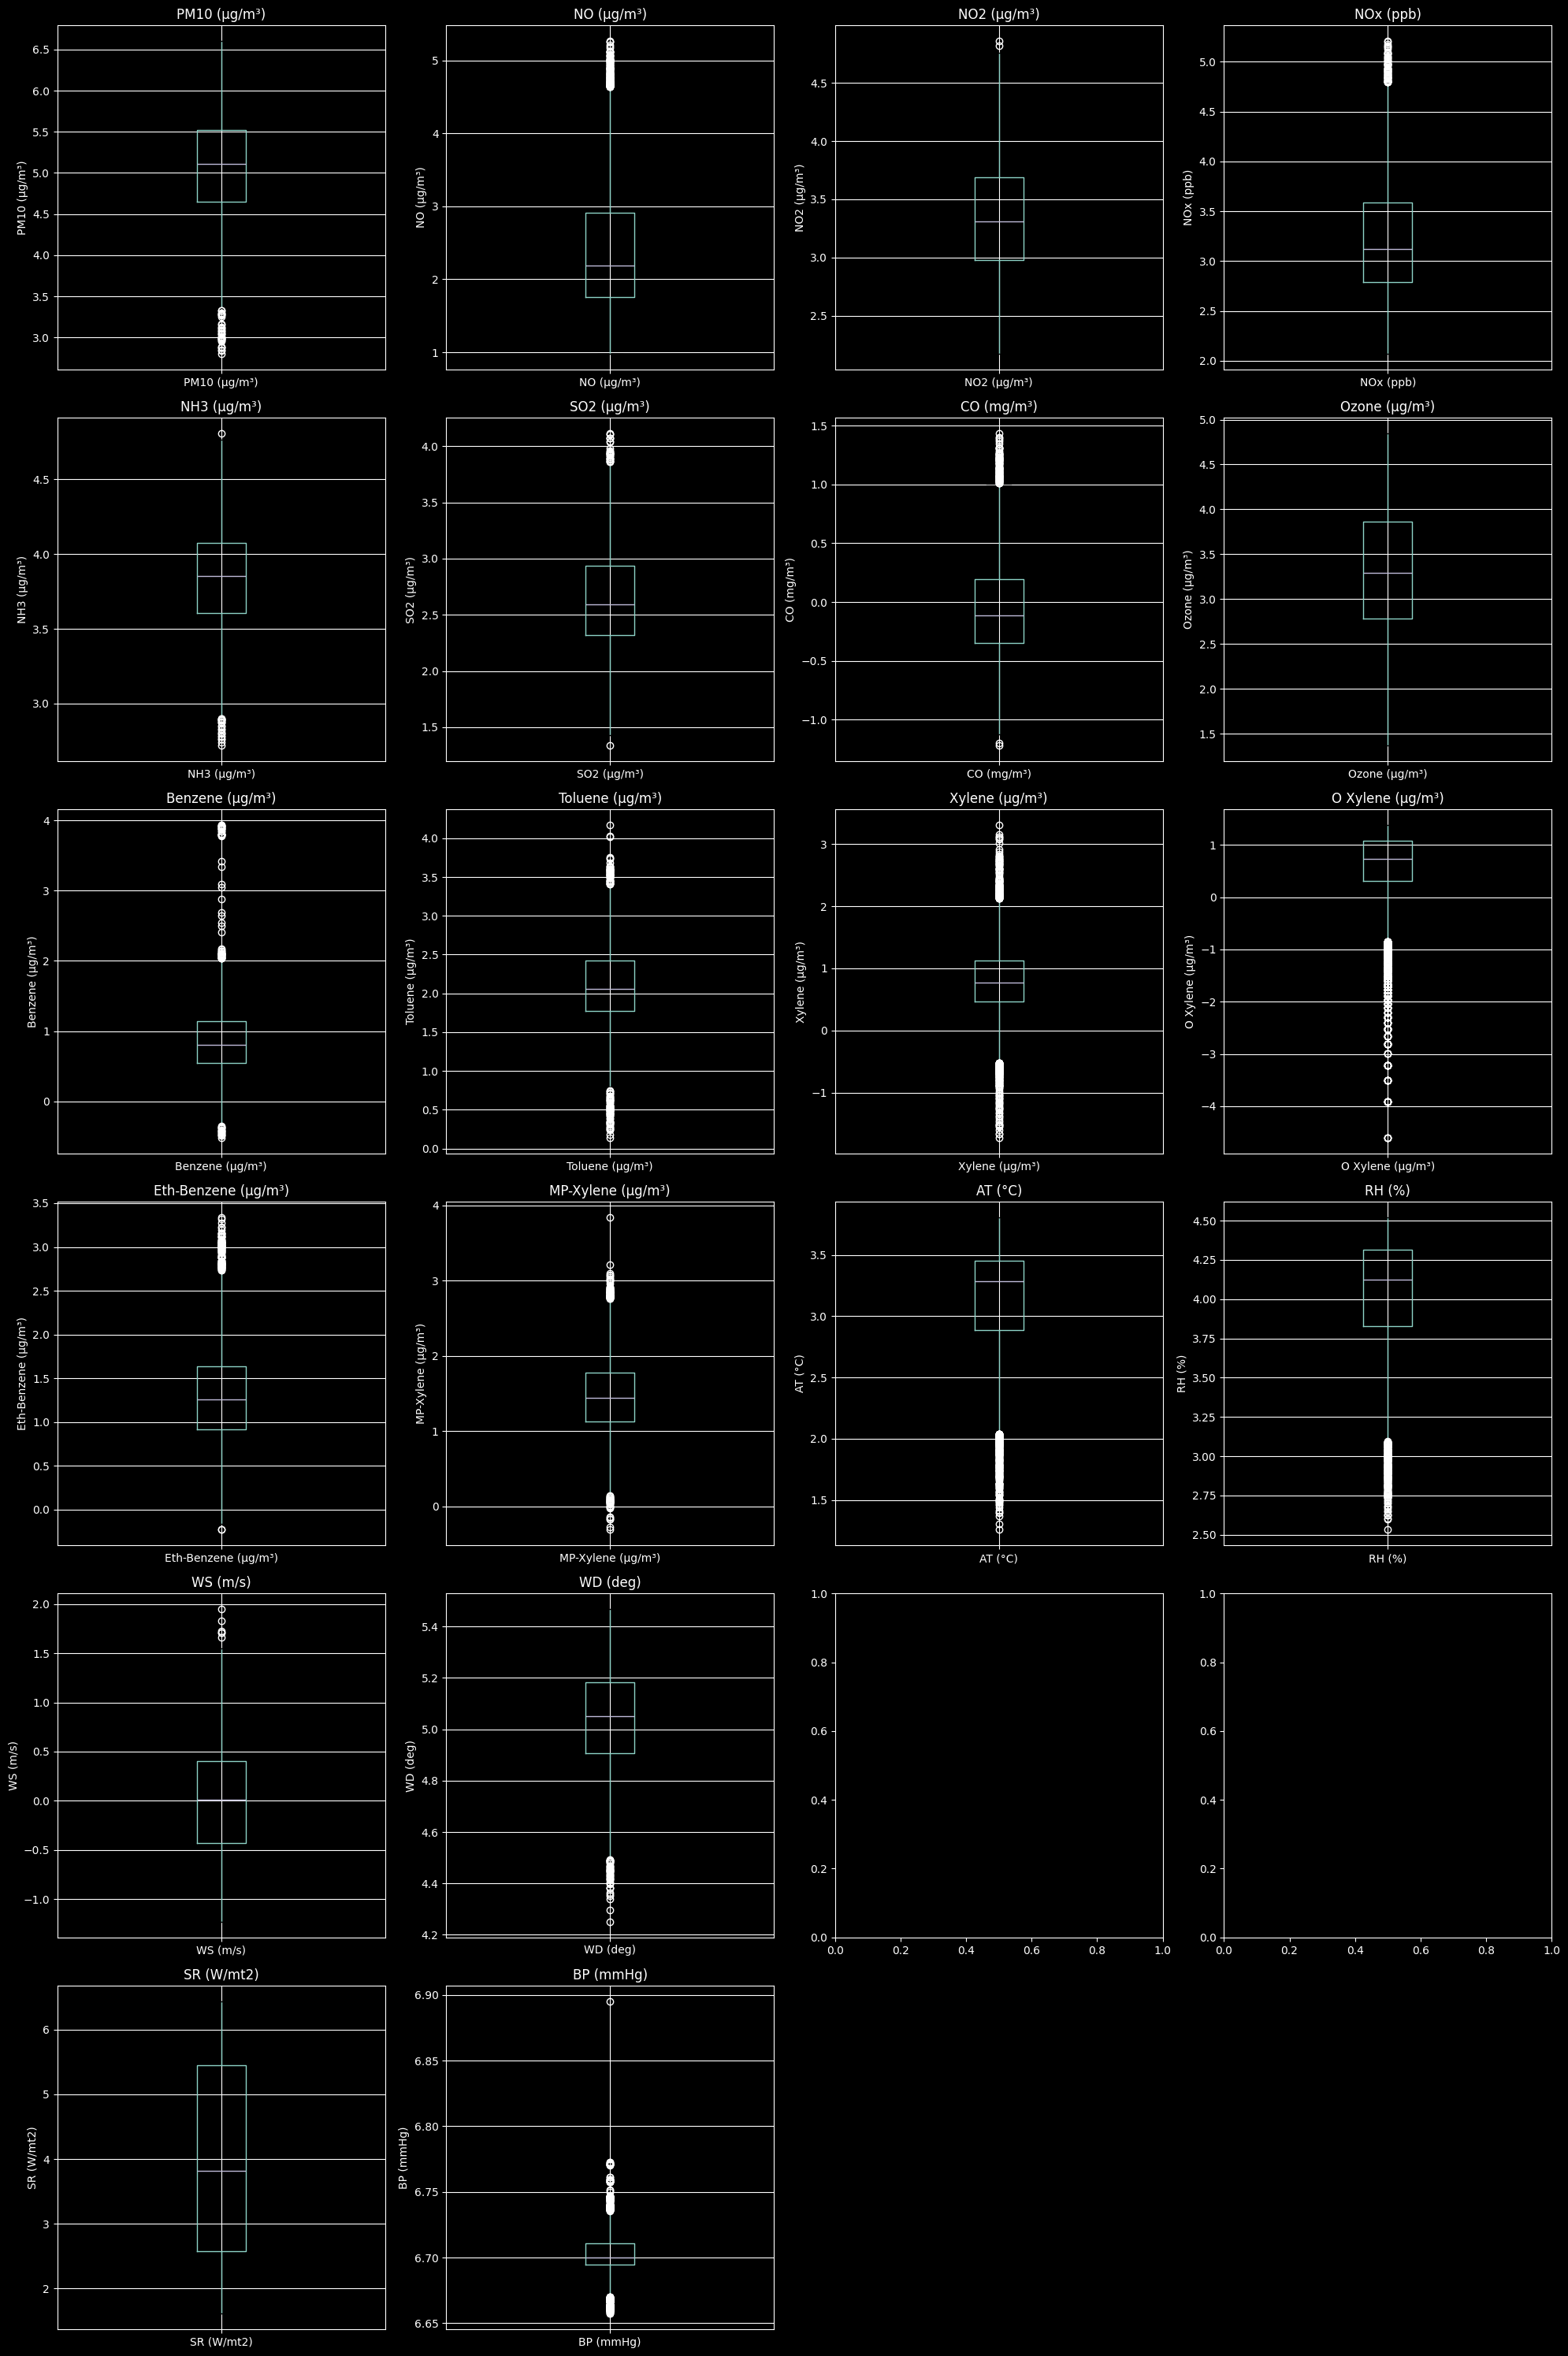

In [25]:
col = 4
row = math.ceil(len(numerical_features_no_label) / col)

fig, axes = plt.subplots(row, col, figsize=(20, 5 * row))
axes = axes.flatten()

data = df.copy()

for i, feature in enumerate(numerical_features_no_label):
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_ylabel(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()